# Part II - Communication of the conclusions
## by Tina RAZAFINDRAKOTO


## Investigation Overview

The dataset that will be processed in this project concerns data from the FordGobike system. This dataset includes information about individual trips taken in a bike share system covering the greater San Francisco Bay Area.

The main thread from this exploration is based on analysis of the relationship between the stations of departure and arrival, the duration of the journey, the information about the people who use the bikes and the types of bike.

## Dataset Overview

this set of data includes 16 columns and 183412 rows that containt float, integer and object values 
The colomns are composed by:
- duration_sec : The duration of use, expressed in seconds.
- start_time, end_time: The start and end time of the trip, expressed in date and time.
- start_station_id, end_station_id: The identification number of the start and end stations of the trip.
- start_station_name, end_station_name: The name of the start and end stations of the trip.
- start_station_latitude, start_station_longitude, end_station_latitude: The geographic coordinates of the start and end stations.
- bike_id: The identification number of the bike.
- user_type: The type of customer using the bike: subscribers or simple customer.
- member_birth_year : The year of birth of the customer.
- member_gender: The gender of the customer.
- bike_share_for_all_trip : Bike shared during the whole trip : yes or no.
- member_age: age of the member
- duration_min : duration of use in minutes

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv("201902-fordgobike-tripdata_clean.csv")
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174760 entries, 0 to 174759
Data columns (total 19 columns):
Unnamed: 0                 174760 non-null int64
duration_sec               174760 non-null int64
start_time                 174760 non-null object
end_time                   174760 non-null object
start_station_id           174760 non-null int64
start_station_name         174760 non-null object
start_station_latitude     174760 non-null float64
start_station_longitude    174760 non-null float64
end_station_id             174760 non-null int64
end_station_name           174760 non-null object
end_station_latitude       174760 non-null float64
end_station_longitude      174760 non-null float64
bike_id                    174760 non-null int64
user_type                  174760 non-null object
member_birth_year          174760 non-null int64
member_gender              174760 non-null object
bike_share_for_all_trip    174760 non-null object
member_age                 174760 non-nul

## Distribution of bike strip duration in minutes


- the duration of the second strips takes a very large interval of data, that's why a logarithmic scale has been used to display the graph of distribution of the next strip durations in minutes in order to capitalize the values on a shorter interval

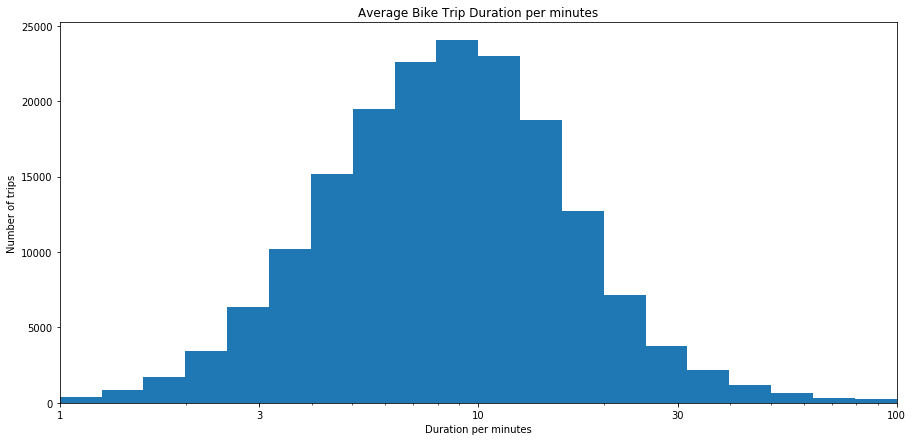

In [23]:
plt.figure(figsize = [15,7]) 
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
plt.hist(data = gobike , x = 'duration_min' , bins = bins);
ticks =  [ 1 , 3, 10, 30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log');
plt.xlim(1,100)
plt.xticks(ticks,labels);
plt.xlabel('Duration per minutes');
plt.title('Average Bike Trip Duration per minutes');
plt.ylabel('Number of trips');

## distribution of duration trips by gender and bike_share_for_all_trip


- the average of the trips of each gender are all around 10 minutes, however, it can also be observed that the gender 'other' has an average duration that is much longer than the gender 'male' and 'female'. 
 - the 'other' gender has a tendency to spend more time on the bike  with the bike type 'bike_share_for_all_trip' than the other genders

Text(0.5,1,'duration trips by gender and bike_share_for_all_trip')

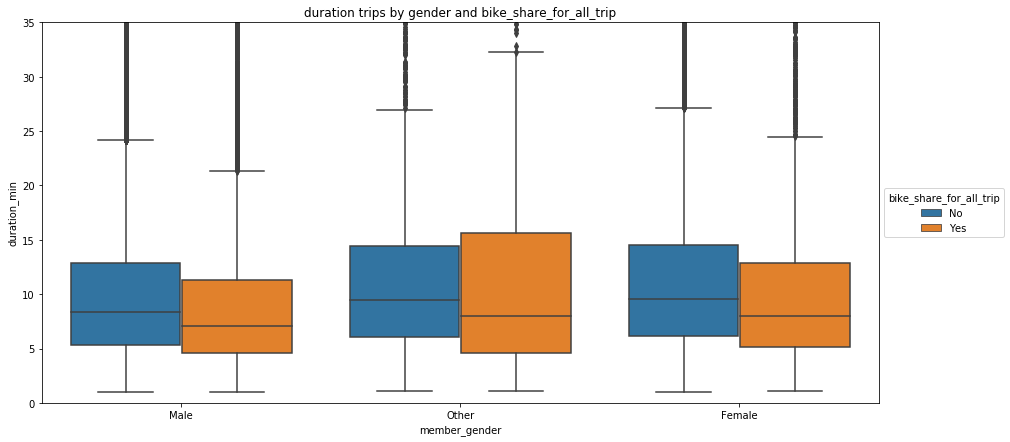

In [24]:
plt.figure(figsize = [15,7]) 
sedan_classes = ['Male', 'Female','Other']
member_genre = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)

gobike['member_genre'] = gobike['member_gender'].astype(member_genre)
plt.ylim(0,35)

# traçage
sb.boxplot(data = gobike, x = 'member_gender', y = 'duration_min', hue = 'bike_share_for_all_trip')
plt.legend(title='bike_share_for_all_trip',loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.title('duration trips by gender and bike_share_for_all_trip')

## Distribution of duration by age and by gender
- the average age from 20 to 30 years old is the one who spends the most time on bike for the 'other' gender, for the female gender it's the one from 10 to 20 years old, which is explained by the fact that these average ages are still young people, on the other hand, the average age that spends the most time for the male gender is the one from 60 to 70 years old
- the fact that it's the 'male' gender that spends the least time on bike can explain this behavior

In [25]:

# generate a new field for member age group
gobike['member_age_bins'] = gobike['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else '70 - 80' if 70<x<=80     
                                                  else x)

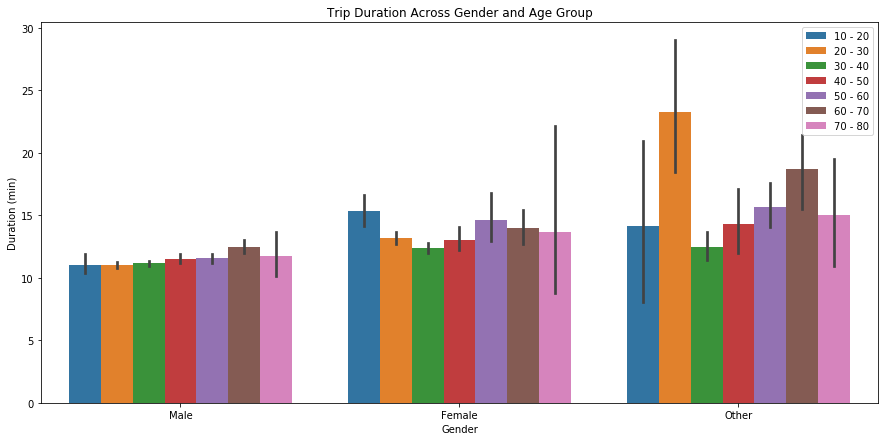

In [26]:
plt.figure(figsize = [15,7]) 
ax = sb.barplot(x='member_gender', y = 'duration_min', hue='member_age_bins', data=gobike.sort_values(by= 'member_age_bins'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 346816 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
